# Project 2 Team 7
## Diana Casanova, Renata Barreto, and Elizabeth Breen

Which U.S. counties should we prioritize to receive a diabetes intervention?

To answer this question, we will analyze the data provided using Machine Learning techniques. Theoretically, these techniques will allow us to not only identify places with the greatest current burden of diabetes, but also to predict where the burden of diabetes may be highest in the future. Places with the greatest burden of diabetes may benefit the most from the diabetes intervention considered by policy makers.

First, we import our libraries and data:

In [1]:
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


sns.set_style("darkgrid")

In [2]:
diabetes = pd.read_csv('Diabetes with Population Info by County 2017.csv') 

## Exploratory Data Analysis

Next, we take stock of the data: What does it look like? What format is it in? How large is it? What kinds of information is provided?

In [3]:
diabetes.head(5)

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
0,Autauga County,Alabama,1001,5178,13489,12525,76.5,55200,54170,1030,...,39614,9403,8050,41831,20054,21777,92.1,8050,3488,4562
1,Baldwin County,Alabama,1003,16707,48542,40024,86.6,208107,204535,3572,...,155502,49811,40665,162430,78104,84326,92.6,40665,18870,21795
2,Barbour County,Alabama,1005,3400,8009,5431,76.2,25782,25429,353,...,19394,5658,4634,20346,10923,9423,115.9,4634,2004,2630
3,Bibb County,Alabama,1007,2371,6534,5827,80.5,22527,22340,187,...,16864,4323,3661,17868,9578,8290,115.5,3661,1633,2028
4,Blount County,Alabama,1009,6282,14227,14365,79.7,57645,56710,935,...,42232,12400,10233,44177,21595,22582,95.6,10233,4540,5693


In [4]:
diabetes.shape

(3220, 95)

In [5]:
diabetes.describe()

,CountyFIPS,race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_1,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
count,3220.000000,3.220000e+03,3.220000e+03,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,...,3.220000e+03,3.220000e+03,3.220000e+03,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3.220000e+03,3220.000000,3220.000000
mean,31393.605280,1.013323e+05,9.803687e+04,3295.423292,9.803687e+04,7.366104e+04,1.282022e+04,840.862422,90.346894,36.718634,...,7.412272e+04,1.906676e+04,1.549044e+04,7.827602e+04,3.809320e+04,4.018282e+04,99.439317,1.549044e+04,6850.940683,8639.495342
std,16292.078954,3.260964e+05,3.142309e+05,13032.711931,3.142309e+05,2.012548e+05,5.514027e+04,3534.196512,534.021931,300.672832,...,2.384994e+05,5.470009e+04,4.432602e+04,2.513513e+05,1.220023e+05,1.293948e+05,14.740158,4.432602e+04,19234.567636,25111.933583
min,1001.000000,7.500000e+01,6.000000e+01,0.000000,6.000000e+01,1.600000e+01,0.000000e+00,0.000000,0.000000,0.000000,...,6.900000e+01,1.900000e+01,1.200000e+01,7.100000e+01,3.600000e+01,3.100000e+01,70.800000,1.200000e+01,0.000000,10.000000
25%,19032.500000,1.121425e+04,1.090100e+04,169.750000,1.090100e+04,9.050250e+03,1.167500e+02,30.000000,0.000000,0.000000,...,8.314250e+03,2.583750e+03,2.111500e+03,8.691500e+03,4.355250e+03,4.285250e+03,93.000000,2.111500e+03,984.750000,1126.000000
50%,30024.000000,2.595050e+04,2.537900e+04,492.000000,2.537900e+04,2.161750e+04,8.380000e+02,114.000000,9.000000,0.000000,...,1.936550e+04,5.704500e+03,4.698500e+03,2.026050e+04,9.997500e+03,1.019050e+04,96.500000,4.698500e+03,2129.500000,2548.000000
75%,46105.500000,6.655225e+04,6.497525e+04,1742.500000,6.497525e+04,5.711775e+04,5.591000e+03,425.250000,48.000000,6.000000,...,4.906400e+04,1.435650e+04,1.171375e+04,5.200525e+04,2.557400e+04,2.664950e+04,100.800000,1.171375e+04,5234.000000,6314.500000
max,72153.000000,1.009805e+07,9.700372e+06,397680.000000,9.700372e+06,5.186859e+06,1.230494e+06,82699.000000,14104.000000,10609.000000,...,7.433332e+06,1.610630e+06,1.299277e+06,7.851531e+06,3.827779e+06,4.023752e+06,414.700000,1.299277e+06,561006.000000,738271.000000


In [6]:
diabetes.dtypes

County                                                                               object
State                                                                                object
CountyFIPS                                                                            int64
Diabetes_Number                                                                      object
Obesity_Number                                                                       object
                                                                                     ...   
sex and age_total population_18 years and over_female                                 int64
sex and age_total population_18 years and over_sex ratio (males per 100 females)    float64
sex and age_total population_65 years and over_1                                      int64
sex and age_total population_65 years and over_male                                   int64
sex and age_total population_65 years and over_female                           

In [7]:
# convert strings to numeric data types
fips = diabetes['CountyFIPS']
diabetes = diabetes.apply(pd.to_numeric, errors = 'coerce')
diabetes.head()


,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
0,NaN,NaN,1001,5178.0,13489.0,12525.0,76.5,55200,54170,1030,...,39614,9403,8050,41831,20054,21777,92.1,8050,3488,4562
1,NaN,NaN,1003,16707.0,48542.0,40024.0,86.6,208107,204535,3572,...,155502,49811,40665,162430,78104,84326,92.6,40665,18870,21795
2,NaN,NaN,1005,3400.0,8009.0,5431.0,76.2,25782,25429,353,...,19394,5658,4634,20346,10923,9423,115.9,4634,2004,2630
3,NaN,NaN,1007,2371.0,6534.0,5827.0,80.5,22527,22340,187,...,16864,4323,3661,17868,9578,8290,115.5,3661,1633,2028
4,NaN,NaN,1009,6282.0,14227.0,14365.0,79.7,57645,56710,935,...,42232,12400,10233,44177,21595,22582,95.6,10233,4540,5693


In [8]:
# make rates
diabetes_rates = diabetes.div(diabetes['race_total population'], axis = 0)


In [9]:
columns_drop = ['County',
                'State',
                'CountyFIPS',
                'race_total population',
                'race_total population_one race', 
                'race_total population_two or more races',
                'race_total population_one race_1', 
                'race_total population_one race_american indian and alaska native_cherokee tribal grouping', 
                'race_total population_one race_american indian and alaska native_chippewa tribal grouping',
                'race_total population_one race_american indian and alaska native_navajo tribal grouping',
                'race_total population_one race_american indian and alaska native_sioux tribal grouping',
                'race_total population_one race_asian_asian indian',
                'race_total population_one race_asian_chinese',
                'race_total population_one race_asian_filipino',
                'race_total population_one race_asian_japanese',
                'race_total population_one race_asian_korean',
                'race_total population_one race_asian_vietnamese',
                'race_total population_one race_asian_other asian',
                'race_total population_one race_native hawaiian and other pacific islander_native hawaiian',
                'race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro',
                'race_total population_one race_native hawaiian and other pacific islander_samoan',
                'race_total population_one race_native hawaiian and other pacific islander_other pacific islander',
                'race_total population_two or more races_1',
                'race_total population_two or more races_white and black or african american',
                'race_total population_two or more races_white and american indian and alaska native',
                'race_total population_two or more races_white and asian',
                'race_total population_two or more races_black or african american and american indian and alaska native',
                'race alone or in combination with one or more other races_total population',
                'race alone or in combination with one or more other races_total population_american indian and alaska native',
                'race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander',
                'race alone or in combination with one or more other races_total population_some other race',
                'hispanic or latino and race_total population_hispanic or latino (of any race)_mexican',
                'hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican',
                'hispanic or latino and race_total population_hispanic or latino (of any race)_cuban',
                'hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino',
                'hispanic or latino and race_total population_not hispanic or latino',
                'hispanic or latino and race_total population_not hispanic or latino_white alone',
                'hispanic or latino and race_total population_not hispanic or latino_black or african american alone',
                'hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone',
                'hispanic or latino and race_total population_not hispanic or latino_asian alone',
                'hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone',
                'hispanic or latino and race_total population_not hispanic or latino_some other race alone',
                'hispanic or latino and race_total population_not hispanic or latino_two or more races',
                'hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race',
                'hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some other race -  and three or more races',
                'citizen -  voting age population_citizen -  18 and over population',
                'citizen -  voting age population_citizen -  18 and over population_male',
                'citizen -  voting age population_citizen -  18 and over population_female',
                'sex and age_total population',
                'sex and age_total population_sex ratio (males per 100 females)',
                'sex and age_total population_median age (years)',
                'sex and age_total population_under 18 years',
                'sex and age_total population_16 years and over',
                'sex and age_total population_21 years and over',
                'sex and age_total population_62 years and over',
                'sex and age_total population_65 years and over',
                'sex and age_total population_18 years and over_1',
                'sex and age_total population_18 years and over_sex ratio (males per 100 females)',
                'sex and age_total population_65 years and over_1',
                'sex and age_total population_65 years and over_male',
                'sex and age_total population_65 years and over_female', 'total housing units']

In [10]:
diabetes.drop(columns=columns_drop, inplace=True)

In [11]:
# search for missing data
diabetes.isnull().sum()

Diabetes_Number                                                                                          1
Obesity_Number                                                                                          78
Physical_Inactivity_Number                                                                              78
sex and age_total population_65 years and over_sex ratio (males per 100 females)                        29
race_total population_one race_white                                                                     0
race_total population_one race_black or african american                                                 0
race_total population_one race_american indian and alaska native                                         0
race_total population_one race_asian                                                                     0
race_total population_one race_native hawaiian and other pacific islander                                0
race_total population_one race_some o

In [12]:
diabetes = diabetes.dropna()

In [13]:
# search for missing data
diabetes.isnull().sum()

Diabetes_Number                                                                                         0
Obesity_Number                                                                                          0
Physical_Inactivity_Number                                                                              0
sex and age_total population_65 years and over_sex ratio (males per 100 females)                        0
race_total population_one race_white                                                                    0
race_total population_one race_black or african american                                                0
race_total population_one race_american indian and alaska native                                        0
race_total population_one race_asian                                                                    0
race_total population_one race_native hawaiian and other pacific islander                               0
race_total population_one race_some other race

In [14]:
diabetes.shape

(3112, 33)

In [15]:
diabetes_rates.shape

(3220, 95)

In [16]:
diabetes_rates.drop(columns=columns_drop, inplace=True)

In [17]:
diabetes_rates.shape

(3220, 33)

In [18]:
diabetes_rates.isnull().sum()

Diabetes_Number                                                                                          1
Obesity_Number                                                                                          78
Physical_Inactivity_Number                                                                              78
sex and age_total population_65 years and over_sex ratio (males per 100 females)                        29
race_total population_one race_white                                                                     0
race_total population_one race_black or african american                                                 0
race_total population_one race_american indian and alaska native                                         0
race_total population_one race_asian                                                                     0
race_total population_one race_native hawaiian and other pacific islander                                0
race_total population_one race_some o

In [19]:
diabetes_rates = diabetes_rates.dropna()

In [20]:
diabetes_rates.shape
diabetes_rates.isnull().sum()

Diabetes_Number                                                                                         0
Obesity_Number                                                                                          0
Physical_Inactivity_Number                                                                              0
sex and age_total population_65 years and over_sex ratio (males per 100 females)                        0
race_total population_one race_white                                                                    0
race_total population_one race_black or african american                                                0
race_total population_one race_american indian and alaska native                                        0
race_total population_one race_asian                                                                    0
race_total population_one race_native hawaiian and other pacific islander                               0
race_total population_one race_some other race

## Visualization and Plotting

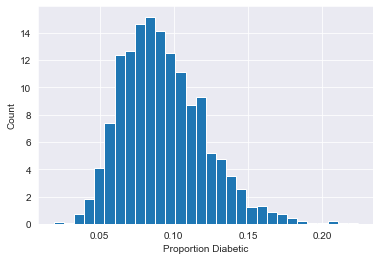

In [21]:
x = diabetes_rates['Diabetes_Number']
plt.hist(x, density=True, bins=30)  # `density=False` would make counts
plt.ylabel('Count')
plt.xlabel('Proportion Diabetic');

This histogram gives us a sense of the distribution of diabetes prevalence across counties.

True


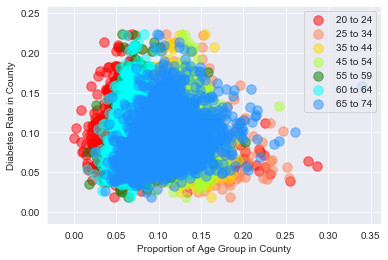

In [22]:
ax1 = diabetes_rates.plot(kind='scatter', x='sex and age_total population_20 to 24 years', y='Diabetes_Number', color='r', alpha = 0.5, s = 90, label = "20 to 24")
ax2 = diabetes_rates.plot(kind='scatter', x='sex and age_total population_25 to 34 years', y='Diabetes_Number', color='coral', alpha = 0.5, s = 90, label = "25 to 34", ax=ax1)
ax3 = diabetes_rates.plot(kind='scatter', x='sex and age_total population_35 to 44 years', y='Diabetes_Number', color='gold', alpha = 0.5, s = 90, label = "35 to 44", ax=ax1)
ax4 = diabetes_rates.plot(kind='scatter', x='sex and age_total population_45 to 54 years', y='Diabetes_Number', color='greenyellow', alpha = 0.5, s = 90, label = "45 to 54", ax=ax1)
ax5 = diabetes_rates.plot(kind='scatter', x='sex and age_total population_55 to 59 years', y='Diabetes_Number', color='green', alpha = 0.5, s = 90, label = "55 to 59", ax=ax1)
ax6 = diabetes_rates.plot(kind='scatter', x='sex and age_total population_60 to 64 years', y='Diabetes_Number', color='aqua',alpha = 0.5, s = 90, label = "60 to 64", ax=ax1)
ax7 = diabetes_rates.plot(kind='scatter', x='sex and age_total population_65 to 74 years', y='Diabetes_Number', color='dodgerblue', alpha = 0.5, s = 90, label = "65 to 74", ax=ax1)

ax1.set_xlabel("Proportion of Age Group in County")
ax1.set_ylabel("Diabetes Rate in County")

print(ax1 == ax2 == ax3 == ax4 == ax5 == ax6 == ax7) 

# These variables are correlated with one another, so we should also drop the from the models

Above, we plotted proportion diabetic in county against proportion age group in county. This plot may be misleading because it is probably reflective of the age structure of the population, but it does show us that, for instance, counties with the highest proportions of diabetics tend to have lower proportions of people aged 20-24. The places with larger proportions of older folks appear to have larger proportions diabetic, too. 

Text(0.5, 0, 'Proportion of County Self-identified as Black or African American')

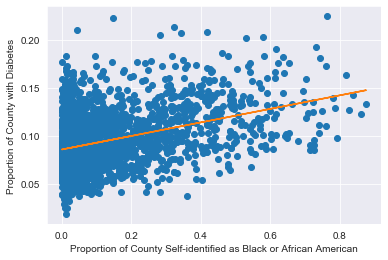

In [23]:
x = np.array(diabetes_rates['race alone or in combination with one or more other races_total population_black or african american'])
y = np.array(diabetes_rates['Diabetes_Number'])
plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)

plt.ylabel('Proportion of County with Diabetes')
plt.xlabel('Proportion of County Self-identified as Black or African American')

Above, we plotted the proportion of the county that self identified as Black or African American (alone, or in combination with other races) against the proportion of the county diagnosed with diabetes. We also plotted the proportion of non-Hispanic whites, proportion of Hispanic/Latinx people of any race, and the proportion Asian against the proportion of the population with diabetes. We found that proportion Black has a positive relationship with proportion diabetic, as shown by the regression line above, while each other group we plotted had a negative relationship with proportion diabetic. This tells us that as the proportion Black in a county increases, the proportion diabetic also increases, though this relationship may be confounded by other features.

## 3: Prepare to Fit Model

### 3.1 Data Cleaning

At this point the data is structured to predict a quantitative outcome (e.g., continuous variable). However, we are also interested in testing machine learning algorithms that predict qualitative outcomes. 

In this next step, we'll use the continous variable 'diabetes_rates' and create a binary variable where a value of 1 designates that the county's diabetes rates fall within the top quartile and 0 designates that the county's diabetes rates do not fall with the top quartile. 

In [24]:
diabetes_rates['diabetes_top25'] = np.where(diabetes_rates['Diabetes_Number'] > np.nanquantile(diabetes_rates['Diabetes_Number'], q=0.75), 1, 0)
diabetes_rates.head()


,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_some other race,...,sex and age_total population_45 to 54 years,sex and age_total population_55 to 59 years,sex and age_total population_60 to 64 years,sex and age_total population_65 to 74 years,sex and age_total population_75 to 84 years,sex and age_total population_85 years and over,sex and age_total population_18 years and over,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,diabetes_top25
0,0.093804,0.244366,0.226902,0.001386,0.768786,0.191395,0.002880,0.010290,0.000580,0.007409,...,0.142264,0.074837,0.048804,0.085344,0.045725,0.014764,0.757808,0.363297,0.394511,0
1,0.080281,0.233255,0.192324,0.000416,0.862662,0.094970,0.007314,0.008073,0.000043,0.009774,...,0.136132,0.069387,0.071362,0.117973,0.058456,0.018976,0.780512,0.375307,0.405205,0
2,0.131875,0.310643,0.210651,0.002956,0.473819,0.475758,0.002793,0.003724,0.000039,0.030176,...,0.133892,0.064270,0.064037,0.109379,0.053991,0.016368,0.789155,0.423668,0.365488,1
3,0.105251,0.290052,0.258667,0.003573,0.766547,0.222755,0.000355,0.001642,0.000000,0.000400,...,0.152661,0.066320,0.053980,0.094198,0.049363,0.018955,0.793182,0.425179,0.368003,0
4,0.108977,0.246804,0.249198,0.001383,0.955052,0.014954,0.002446,0.003435,0.000312,0.007581,...,0.137861,0.067569,0.062677,0.106375,0.056119,0.015023,0.766363,0.374621,0.391743,0


In [25]:
diabetes_rates.columns

Index(['Diabetes_Number', 'Obesity_Number', 'Physical_Inactivity_Number',
       'sex and age_total population_65 years and over_sex ratio (males per 100 females)',
       'race_total population_one race_white',
       'race_total population_one race_black or african american',
       'race_total population_one race_american indian and alaska native',
       'race_total population_one race_asian',
       'race_total population_one race_native hawaiian and other pacific islander',
       'race_total population_one race_some other race',
       'race alone or in combination with one or more other races_total population_white',
       'race alone or in combination with one or more other races_total population_black or african american',
       'race alone or in combination with one or more other races_total population_asian',
       'hispanic or latino and race_total population',
       'hispanic or latino and race_total population_hispanic or latino (of any race)',
       'sex and age_to

In [26]:
# Fix column names

diabetes_rates.columns = ['Diabetes_Number',
                           'Obesity',
                           'Inactivity', 
                           'sex_ratio_65+', 
                           'race_white_only',
                           'race_Black_only',
                           'race_fst_nation_only',
                           'race_asian_only',
                           'race_pac_isl_only',
                           'race_mixed',
                           'race_white_alone_or_combined',
                           'race_black_alone_or_combined',
                           'race_asian_alone_or_combined',
                           'hisp_latinx_all',
                           'hisp_latinx_any_race',
                           'total_male_pop',
                           'total_female_pop', 
                           'pop_under5', 
                           'population_5_to_9',
                           'pop_10_to_14',
                           'pop_15_to_19',
                           'pop_20_to_24',
                           'pop_25_to_34',
                           'pop_35_to_44',
                           'pop_45_to_54',
                           'pop_55_to_59',
                           'pop_60_to_64',
                           'pop_65_to_74',
                           'pop_75_to_84',
                           'pop_85+', 
                           'pop_18+',
                           'male_pop_18+',
                           'female_pop_18+',
                           'diabetes_top25']

# Read table from the data folder
#census = pd.read_table("../../data/adult.data", sep = ',', names = col_names)

In [27]:
diabetes_rates.columns

Index(['Diabetes_Number', 'Obesity', 'Inactivity', 'sex_ratio_65+',
       'race_white_only', 'race_Black_only', 'race_fst_nation_only',
       'race_asian_only', 'race_pac_isl_only', 'race_mixed',
       'race_white_alone_or_combined', 'race_black_alone_or_combined',
       'race_asian_alone_or_combined', 'hisp_latinx_all',
       'hisp_latinx_any_race', 'total_male_pop', 'total_female_pop',
       'pop_under5', 'population_5_to_9', 'pop_10_to_14', 'pop_15_to_19',
       'pop_20_to_24', 'pop_25_to_34', 'pop_35_to_44', 'pop_45_to_54',
       'pop_55_to_59', 'pop_60_to_64', 'pop_65_to_74', 'pop_75_to_84',
       'pop_85+', 'pop_18+', 'male_pop_18+', 'female_pop_18+',
       'diabetes_top25'],
      dtype='object')

### 3.2: Partition Data

#### Train/Test/Validation Split

In [28]:
#For quantitative outcome
X = diabetes_rates.drop(['Diabetes_Number', 'diabetes_top25'], axis = 1)
y = diabetes_rates['Diabetes_Number']
X.head()

,Obesity,Inactivity,sex_ratio_65+,race_white_only,race_Black_only,race_fst_nation_only,race_asian_only,race_pac_isl_only,race_mixed,race_white_alone_or_combined,...,pop_35_to_44,pop_45_to_54,pop_55_to_59,pop_60_to_64,pop_65_to_74,pop_75_to_84,pop_85+,pop_18+,male_pop_18+,female_pop_18+
0,0.244366,0.226902,0.001386,0.768786,0.191395,0.002880,0.010290,0.000580,0.007409,0.785634,...,0.133587,0.142264,0.074837,0.048804,0.085344,0.045725,0.014764,0.757808,0.363297,0.394511
1,0.233255,0.192324,0.000416,0.862662,0.094970,0.007314,0.008073,0.000043,0.009774,0.877861,...,0.121942,0.136132,0.069387,0.071362,0.117973,0.058456,0.018976,0.780512,0.375307,0.405205
2,0.310643,0.210651,0.002956,0.473819,0.475758,0.002793,0.003724,0.000039,0.030176,0.483322,...,0.120394,0.133892,0.064270,0.064037,0.109379,0.053991,0.016368,0.789155,0.423668,0.365488
3,0.290052,0.258667,0.003573,0.766547,0.222755,0.000355,0.001642,0.000000,0.000400,0.774493,...,0.128512,0.152661,0.066320,0.053980,0.094198,0.049363,0.018955,0.793182,0.425179,0.368003
4,0.246804,0.249198,0.001383,0.955052,0.014954,0.002446,0.003435,0.000312,0.007581,0.971134,...,0.124087,0.137861,0.067569,0.062677,0.106375,0.056119,0.015023,0.766363,0.374621,0.391743


In [29]:
from sklearn.model_selection import train_test_split 

# set the random seed
np.random.seed(10)

# split the data
# train_test_split returns 4 values: X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.80, test_size=0.20)

In [30]:
#For qualitative outcome
Xclass = diabetes_rates.drop(['Diabetes_Number', 'diabetes_top25'], axis = 1)
yclass= diabetes_rates['diabetes_top25']
Xclass.head()

,Obesity,Inactivity,sex_ratio_65+,race_white_only,race_Black_only,race_fst_nation_only,race_asian_only,race_pac_isl_only,race_mixed,race_white_alone_or_combined,...,pop_35_to_44,pop_45_to_54,pop_55_to_59,pop_60_to_64,pop_65_to_74,pop_75_to_84,pop_85+,pop_18+,male_pop_18+,female_pop_18+
0,0.244366,0.226902,0.001386,0.768786,0.191395,0.002880,0.010290,0.000580,0.007409,0.785634,...,0.133587,0.142264,0.074837,0.048804,0.085344,0.045725,0.014764,0.757808,0.363297,0.394511
1,0.233255,0.192324,0.000416,0.862662,0.094970,0.007314,0.008073,0.000043,0.009774,0.877861,...,0.121942,0.136132,0.069387,0.071362,0.117973,0.058456,0.018976,0.780512,0.375307,0.405205
2,0.310643,0.210651,0.002956,0.473819,0.475758,0.002793,0.003724,0.000039,0.030176,0.483322,...,0.120394,0.133892,0.064270,0.064037,0.109379,0.053991,0.016368,0.789155,0.423668,0.365488
3,0.290052,0.258667,0.003573,0.766547,0.222755,0.000355,0.001642,0.000000,0.000400,0.774493,...,0.128512,0.152661,0.066320,0.053980,0.094198,0.049363,0.018955,0.793182,0.425179,0.368003
4,0.246804,0.249198,0.001383,0.955052,0.014954,0.002446,0.003435,0.000312,0.007581,0.971134,...,0.124087,0.137861,0.067569,0.062677,0.106375,0.056119,0.015023,0.766363,0.374621,0.391743


In [31]:
from sklearn.model_selection import train_test_split 

# set the random seed
np.random.seed(10)

# split the data
# train_test_split returns 4 values: X_train, X_test, y_train, y_test

Xclass_train, Xclass_test, yclass_train, yclass_test = train_test_split(Xclass, yclass,
                                                    train_size=0.80, test_size=0.20)

In [32]:
print("Dimensions of Diabetes Rates Dataframe are", X.shape)
print("Dimensions of Classification Dataframe are", Xclass.shape)

Dimensions of Diabetes Rates Dataframe are (3112, 32)
Dimensions of Classification Dataframe are (3112, 32)


#### Validation Set

In [33]:
# split the continuous data
# Returns 4 values: X_train, X_validate, y_train, y_validate

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train,
                                                    train_size=0.75, test_size=0.25)

In [34]:
print("Shape of X_train is", X_train.shape)
print("Shape of y_train is", y_train.shape)
print("Shape of X_test is", X_test.shape)
print("Shape of y_test is", y_test.shape)

Shape of X_train is (1866, 32)
Shape of y_train is (1866,)
Shape of X_test is (623, 32)
Shape of y_test is (623,)


In [35]:
# split the categorical data
# Returns 4 values: X_train, X_validate, y_train, y_validate

Xclass_train, Xclass_validate, yclass_train, yclass_validate = train_test_split(Xclass_train, yclass_train,
                                                    train_size=0.75, test_size=0.25)

In [36]:
print("Shape of X_train is", Xclass_train.shape)
print("Shape of y_train is", yclass_train.shape)
print("Shape of X_validate is", Xclass_test.shape)
print("Shape of y_validate is", yclass_test.shape)

Shape of X_train is (1866, 32)
Shape of y_train is (1866,)
Shape of X_validate is (623, 32)
Shape of y_validate is (623,)


### 3.3 Feature Selection

We start by looking at feature correlation, because it is preferable to remove features that are highly correlated with one another. In part, this is because we aren't gaining any additional information from a feature that is highly correlated with another feature. It is also a way of simplifying the model. A model with fewer features is less likely to be overfitted.

In [37]:
diabetes_rates.cov(min_periods=1) #min number of observation per column to get results

,Diabetes_Number,Obesity,Inactivity,sex_ratio_65+,race_white_only,race_Black_only,race_fst_nation_only,race_asian_only,race_pac_isl_only,race_mixed,...,pop_45_to_54,pop_55_to_59,pop_60_to_64,pop_65_to_74,pop_75_to_84,pop_85+,pop_18+,male_pop_18+,female_pop_18+,diabetes_top25
Diabetes_Number,0.000789,0.000684,0.000739,-2.835695e-05,-0.001086,0.001498,0.000018,-0.000186,-7.437766e-06,-0.000178,...,0.000052,0.000038,0.000060,0.000188,0.000106,0.000001,0.000154,0.000029,0.000125,0.009510
Obesity,0.000684,0.001965,0.001142,-9.512606e-05,-0.001323,0.002029,0.000056,-0.000302,-1.449781e-05,-0.000361,...,0.000096,0.000036,0.000049,0.000073,0.000047,-0.000008,0.000108,0.000069,0.000039,0.007689
Inactivity,0.000739,0.001142,0.001981,2.350292e-05,-0.000824,0.001846,-0.000178,-0.000370,-1.687182e-05,-0.000331,...,0.000084,0.000062,0.000090,0.000262,0.000199,0.000021,0.000217,0.000112,0.000105,0.008730
sex_ratio_65+,-0.000028,-0.000095,0.000024,5.057635e-04,0.000353,-0.000374,0.000107,-0.000063,-5.197177e-07,-0.000011,...,-0.000039,0.000091,0.000073,0.000109,0.000098,0.000033,0.000037,0.000111,-0.000074,-0.000330
race_white_only,-0.001086,-0.001323,-0.000824,3.529057e-04,0.028068,-0.019329,-0.004960,-0.001305,-1.009701e-04,-0.001589,...,0.000200,0.000557,0.000609,0.001253,0.000953,0.000508,0.001055,0.000691,0.000364,-0.014927
race_Black_only,0.001498,0.002029,0.001846,-3.738588e-04,-0.019329,0.020819,-0.001151,0.000081,-2.583036e-05,-0.000113,...,0.000005,-0.000264,-0.000295,-0.000520,-0.000455,-0.000277,0.000078,-0.000321,0.000400,0.018758
race_fst_nation_only,0.000018,0.000056,-0.000178,1.074261e-04,-0.004960,-0.001151,0.005858,-0.000017,1.124171e-05,-0.000096,...,-0.000149,-0.000079,-0.000088,-0.000257,-0.000176,-0.000104,-0.000785,-0.000262,-0.000523,0.000689
race_asian_only,-0.000186,-0.000302,-0.000370,-6.262518e-05,-0.001305,0.000081,-0.000017,0.000776,5.382023e-05,0.000198,...,0.000028,-0.000061,-0.000080,-0.000194,-0.000137,-0.000041,0.000004,-0.000020,0.000024,-0.002022
race_pac_isl_only,-0.000007,-0.000014,-0.000017,-5.197177e-07,-0.000101,-0.000026,0.000011,0.000054,1.743765e-05,0.000005,...,-0.000002,-0.000003,-0.000002,-0.000005,-0.000006,-0.000002,-0.000004,0.000002,-0.000006,-0.000101
race_mixed,-0.000178,-0.000361,-0.000331,-1.058892e-05,-0.001589,-0.000113,-0.000096,0.000198,5.477086e-06,0.001516,...,-0.000066,-0.000116,-0.000113,-0.000209,-0.000123,-0.000054,-0.000302,-0.000090,-0.000212,-0.001649


In [38]:
diabetes_rates.corr(method='pearson', min_periods=1)

,Diabetes_Number,Obesity,Inactivity,sex_ratio_65+,race_white_only,race_Black_only,race_fst_nation_only,race_asian_only,race_pac_isl_only,race_mixed,...,pop_45_to_54,pop_55_to_59,pop_60_to_64,pop_65_to_74,pop_75_to_84,pop_85+,pop_18+,male_pop_18+,female_pop_18+,diabetes_top25
Diabetes_Number,1.000000,0.549577,0.591118,-0.044877,-0.230673,0.369464,0.008445,-0.238331,-0.063392,-0.162498,...,0.123574,0.111002,0.156701,0.258353,0.223322,0.004893,0.157536,0.032891,0.170041,0.781501
Obesity,0.549577,1.000000,0.578920,-0.095433,-0.178148,0.317216,0.016618,-0.244855,-0.078331,-0.209431,...,0.144088,0.066044,0.080257,0.063712,0.062903,-0.018675,0.069982,0.049621,0.033679,0.400566
Inactivity,0.591118,0.578920,1.000000,0.023479,-0.110549,0.287397,-0.052170,-0.298408,-0.090772,-0.191100,...,0.125519,0.113829,0.147525,0.226473,0.265408,0.052212,0.140291,0.080542,0.090151,0.452858
sex_ratio_65+,-0.044877,-0.095433,0.023479,1.000000,0.093666,-0.115214,0.062413,-0.099987,-0.005534,-0.012095,...,-0.115786,0.334746,0.235501,0.186942,0.258021,0.157574,0.047227,0.158101,-0.126260,-0.033903
race_white_only,-0.230673,-0.178148,-0.110549,0.093666,1.000000,-0.799629,-0.386841,-0.279741,-0.144326,-0.243658,...,0.079648,0.273690,0.265366,0.288244,0.337026,0.328884,0.180865,0.131651,0.082967,-0.205726
race_Black_only,0.369464,0.317216,0.287397,-0.115214,-0.799629,1.000000,-0.104268,0.020122,-0.042870,-0.020096,...,0.002495,-0.150964,-0.149179,-0.138997,-0.186782,-0.208244,0.015550,-0.071140,0.105721,0.300182
race_fst_nation_only,0.008445,0.016618,-0.052170,0.062413,-0.386841,-0.104268,1.000000,-0.008028,0.035174,-0.032133,...,-0.130499,-0.085404,-0.083801,-0.129639,-0.136310,-0.147173,-0.294797,-0.109509,-0.260856,0.020773
race_asian_only,-0.238331,-0.244855,-0.298408,-0.099987,-0.279741,0.020122,-0.008028,1.000000,0.462773,0.182638,...,0.067303,-0.180479,-0.209211,-0.268921,-0.292084,-0.160614,0.003686,-0.022857,0.032228,-0.167676
race_pac_isl_only,-0.063392,-0.078331,-0.090772,-0.005534,-0.144326,-0.042870,0.035174,0.462773,1.000000,0.033692,...,-0.026699,-0.056230,-0.033185,-0.042837,-0.081941,-0.054858,-0.025254,0.018728,-0.055954,-0.056009
race_mixed,-0.162498,-0.209431,-0.191100,-0.012095,-0.243658,-0.020096,-0.032133,0.182638,0.033692,1.000000,...,-0.113334,-0.244948,-0.211332,-0.207303,-0.187387,-0.149201,-0.223161,-0.073992,-0.208116,-0.097819


In [39]:
cor_matrix = X_train.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.70)]
X_train.drop(to_drop, axis=1, inplace=True)

In [40]:
X_validate.drop(to_drop, axis=1, inplace=True)

In [41]:
X_test.drop(to_drop, axis=1, inplace=True)

C:\Users\diana\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [42]:
cor_matrix = Xclass_train.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.70)]
Xclass_train.drop(to_drop, axis=1, inplace=True)

In [43]:
Xclass_validate.drop(to_drop, axis=1, inplace=True)

In [44]:
Xclass_test.drop(to_drop, axis=1, inplace=True)

In [45]:
Xclass.shape

(3112, 32)

## 4: Train Models

### 4.1: Model Description

Choose 5 different machine learning techniques:

**1. Linear Regression**
Linear regression assumes that the underlying relationship between the independent and dependent variables is a linear one, that the data are normally distributed, that there is little to no multicollinearity, and that the variables have a similar variance. Linear regression is often useful to researchers, even though it's rare that all of the underlying assumptions are met, because it gives us a baseline idea about the strength and direction of the relationship. The downside is that if the underlying relationship is not linear, we risk misspecification bias. Because diabetes prevalence likely varies with other characteristics, linear regression is a useful first step for this project.

**2. Ridge Regression**
Ridge Regression is a regularizing technique used to reduce the coefficients of features in our model, in order to avoid overfitting. Ridge regression assumes independence, linearity, and constant variance. It is useful for this problem because it will help us to reduce overfitting and see which variables could be removed from our model.

**3. LASSO Regression**
LASSO is another regularizing technique to reduce the number of features in our model. Like Ridge regression, it uses a tuning parameter to penalize features with small coeficients. LASSO shrinks those coefficients to zero. It is useful for this problem because it will help us to reduce overfitting, creating a better model for prediction.

**4. Logistic Regression**
Logistic Regression is used to predict the probability of a target class. The target variables must be dichotomous, taking a value of 0 or 1. Because logistic regression is used with dichotomous variables, the probability of the default target class = p and the probability of the alternate target class = 1 - p. The upside of logistic regression is its simple interpretability and quick computing time. Logistic regression assumes a linear relationship between features and the target.

**5. Support Vector Machine**
Support Vector Machines are a form of supervised machine learning algorithm that employs a hyperplane to differentiate between different values of target classes. The hyperplane is optimized to maximize the distance between the classes during the training process, and it is then used to predict the classification of future or unobserved data. SVM assumes the data are independent and identically distributed. SVM does well with high-dimensional datasets, an advantage, but requires a clearly delineated hyperparameter to predict well, which is not always possible to achieve.


### 4.2 Train Models

#### 1. Ordinary Least Squares Regression

In [46]:
lin_reg = LinearRegression(normalize=True)
lin_model = lin_reg.fit(X_train, y_train)

#### 2. Ridge Regression

In [47]:
ridge_reg = Ridge() 
ridge_model = ridge_reg.fit(X_train, y_train)
ridge_reg_data = pd.DataFrame([ridge_model.coef_, X.columns]).T
ridge_reg_data.columns = ['Coefficient', 'Feature']

#### 3. LASSO Regression

In [48]:
lasso_reg = Lasso(max_iter=10000) 
lasso_model = lasso_reg.fit(X_train, y_train) 
lasso_reg_data = pd.DataFrame([lasso_model.coef_, X.columns]).T
lasso_reg_data.columns = ['Coefficient', 'Feature']

#### 4. Logistic Regression

In [49]:
log_reg = LogisticRegression()

log_model = log_reg.fit(Xclass_train, yclass_train)

#### 5. Support Vector Machines

In [50]:
svm = SVC()
svm_model = svm.fit(Xclass_train, yclass_train)

## 5: Validate and Refine Model
### 5.1: Predict on the Validation Set
#### 1. Ordinary Least Squares Regression

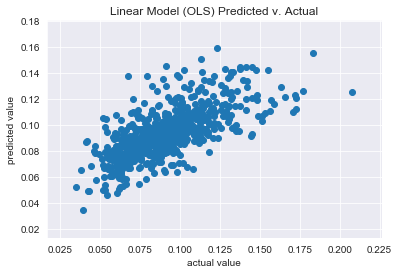

In [51]:
lin_pred = lin_model.predict(X_validate)

plt.scatter(y_validate, lin_pred)
plt.title('Linear Model (OLS) Predicted v. Actual')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()

In [52]:
def rmse(pred, actual):
    return np.sqrt(np.mean((pred - actual) ** 2))

In [53]:
rmse(lin_pred, y_validate)

0.019220592623880692

In [54]:
param_grid = {'fit_intercept': ['True', 'False'],
              'normalize': ['True', 'False']}

lin_grid_reg = GridSearchCV(lin_reg, param_grid, cv=3, iid=False)
lin_grid_reg.fit(X_train, y_train)

best_index = np.argmax(lin_grid_reg.cv_results_["mean_test_score"])
best_lin_pred = lin_grid_reg.best_estimator_.predict(X_validate)

print(lin_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(lin_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', lin_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_lin_pred, y_validate))

{'fit_intercept': 'True', 'normalize': 'True'}
Best CV R^2: 0.4982465958408924
Validation R^2: 0.4545851796085969
Validation RMSE 0.019220592623880692


C:\Users\diana\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


#### 2. Ridge Regression


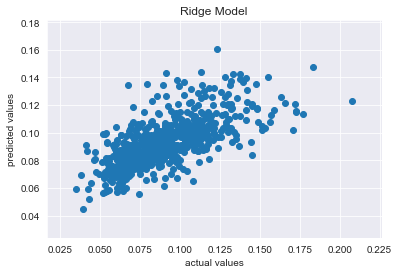

In [55]:
ridge_pred = ridge_model.predict(X_validate)

plt.scatter(y_validate, ridge_pred)
plt.title('Ridge Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

In [56]:
rmse(ridge_pred, y_validate)

0.01955554380934217

In [57]:
param_grid = {'alpha': np.arange(.1, 1, .1),
               'normalize': ['True', 'False'],
             'fit_intercept': ['True', 'False'],
             'solver': ['auto', 'svd', 'cholesky', 'lsqr']}

ridge_grid_reg = GridSearchCV(ridge_reg, param_grid, cv=3, iid=False)
ridge_grid_reg.fit(X_train, y_train)

best_index = np.argmax(ridge_grid_reg.cv_results_["mean_test_score"])
best_ridge_pred = ridge_grid_reg.best_estimator_.predict(X_validate)

print(ridge_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(ridge_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', ridge_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_ridge_pred, y_validate))

{'alpha': 0.1, 'fit_intercept': 'True', 'normalize': 'True', 'solver': 'svd'}
Best CV R^2: 0.49719541409223944
Validation R^2: 0.4592939169980056
Validation RMSE 0.019137444067538863


C:\Users\diana\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


#### 3. LASSO Regression

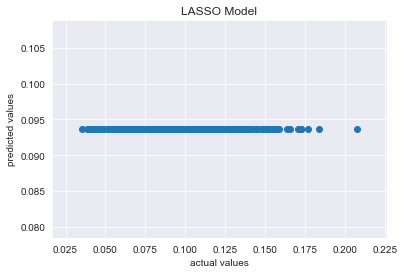

In [58]:
lasso_pred = lasso_model.predict(X_validate)

plt.scatter(y_validate, lasso_pred)
plt.title('LASSO Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

In [59]:
rmse(lasso_pred, y_validate)

0.026105863098580435

In [60]:
param_grid = {'alpha': np.arange(.1, 1, .1),
               'normalize': ['True', 'False'],
             'fit_intercept': ['True', 'False'],
             'selection': ['cyclic', 'random']}

lasso_grid_reg = GridSearchCV(lasso_reg, param_grid, cv=3, iid=False)
lasso_grid_reg.fit(X_train, y_train)

best_index = np.argmax(lasso_grid_reg.cv_results_["mean_test_score"])
best_lasso_pred = lasso_grid_reg.best_estimator_.predict(X_validate)

print(lasso_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(lasso_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', lasso_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_lasso_pred, y_validate))

{'alpha': 0.1, 'fit_intercept': 'True', 'normalize': 'True', 'selection': 'cyclic'}
Best CV R^2: -0.0004088592818273599
Validation R^2: -0.006165678756800741
Validation RMSE 0.026105863098580435


C:\Users\diana\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


#### 4. Logistic Regression

In [61]:
y_pred = log_model.predict(Xclass_validate)

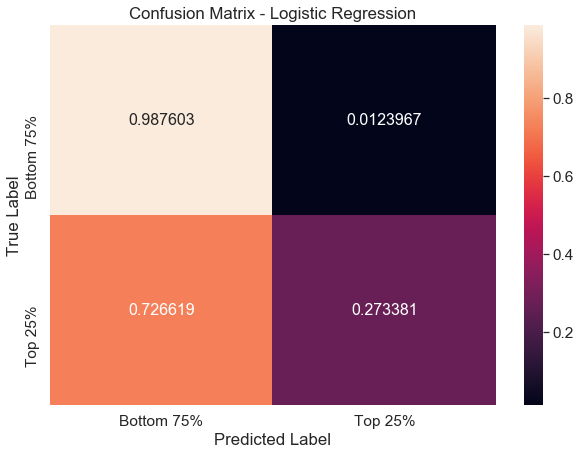

In [62]:
import seaborn as sns

cf_matrix = confusion_matrix(yclass_validate, y_pred, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "Bottom 75%", 1: "Top 25%"})
df_cm.index = ["Bottom 75%", "Top 25%"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [63]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score

param_grid = {'C': np.arange(.1, 1, .1),
               'fit_intercept': ['True', 'False'],
             'solver': ['liblinear','sag', 'saga']}

log_grid_reg = GridSearchCV(log_reg, param_grid, cv=3, iid=False)
log_grid_reg.fit(Xclass_train, yclass_train)

best_index = np.argmax(log_grid_reg.cv_results_["mean_test_score"])
best_log_pred = log_grid_reg.best_estimator_.predict(Xclass_validate)

print(log_grid_reg.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_log_pred, yclass_validate))
print('Best CV R^2:', max(log_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', log_grid_reg.score(Xclass_validate, yclass_validate))
print('Validation RMSE', rmse(best_log_pred, yclass_validate))

{'C': 0.1, 'fit_intercept': 'True', 'solver': 'sag'}
Validation Accuracy 0.8250401284109149
Best CV R^2: 0.77491961414791
Validation R^2: 0.8250401284109149
Validation RMSE 0.41828204789242995


#### 5. Support Vector Machines

In [64]:
y_pred = svm_model.predict(Xclass_validate)

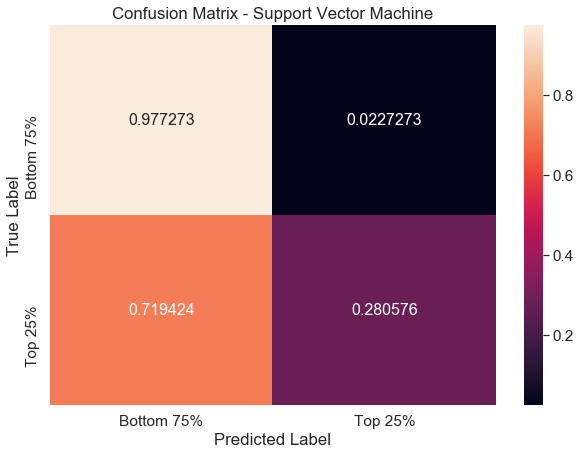

In [65]:
cf_matrix = confusion_matrix(yclass_validate, y_pred, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "Bottom 75%", 1: "Top 25%"})
df_cm.index = ["Bottom 75%", "Top 25%"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix - Support Vector Machine")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [66]:
param_grid = {'C': np.arange(.1, 1, .1),
             'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
             'gamma': ['scale', 'auto'],
             'shrinking': [True, False],
             'decision_function_shape': ['ovo', 'ovr']}

svm_grid_reg = GridSearchCV(svm_model, param_grid, cv=3, iid=False)
svm_grid_reg.fit(Xclass_train, yclass_train)

best_index = np.argmax(svm_grid_reg.cv_results_["mean_test_score"])
best_svm_pred = svm_grid_reg.best_estimator_.predict(Xclass_validate)

print(svm_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(svm_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', svm_grid_reg.score(Xclass_validate, yclass_validate))
print('Validation RMSE', rmse(best_svm_pred, yclass_validate))

{'C': 0.9, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'poly', 'shrinking': True}
Best CV R^2: 0.7888531618435155
Validation R^2: 0.8330658105939005
Validation RMSE 0.40857580619280376


### 5.3: Test Set


In [67]:
X_test.shape

(623, 22)

#### Quantitative Outcome (Continuous Variable)

In [68]:
best_pred = ridge_grid_reg.best_estimator_.predict(X_test)
print('Best CV R^2:', max(ridge_grid_reg.cv_results_["mean_test_score"]))
print('Test R^2:', ridge_grid_reg.score(X_test, y_test))
print('Test RMSE', rmse(best_pred, y_test))

Best CV R^2: 0.49719541409223944
Test R^2: 0.44953693358574376
Test RMSE 0.020448417048437362


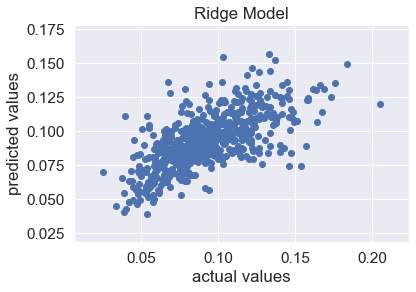

In [69]:
plt.scatter(y_test, best_pred)
plt.title('Ridge Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

#### Qualitatitive Outcome (Categorical Variable)

In [70]:
best_svm_pred = svm_grid_reg.best_estimator_.predict(Xclass_test)
print('Validation Accuracy', accuracy_score(best_svm_pred, yclass_test))
print('Best CV R^2:', max(svm_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', svm_grid_reg.score(Xclass_test, yclass_test))
print('Validation RMSE', rmse(best_svm_pred, yclass_test))

Validation Accuracy 0.8009630818619583
Best CV R^2: 0.7888531618435155
Validation R^2: 0.8009630818619583
Validation RMSE 0.4461355378559768


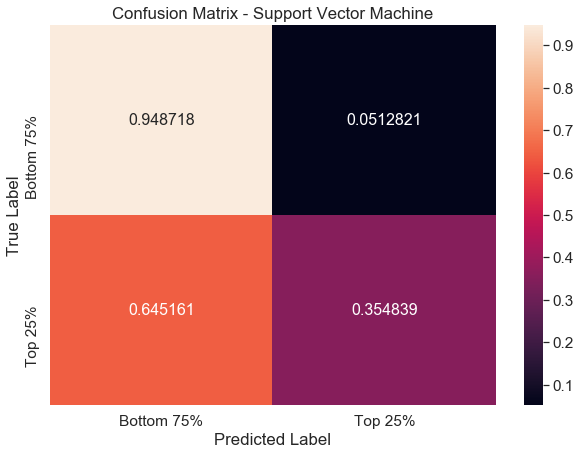

In [71]:
import seaborn as sns

cf_matrix = confusion_matrix(yclass_test, best_svm_pred, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "Bottom 75%", 1: "Top 25%"})
df_cm.index = ["Bottom 75%", "Top 25%"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix - Support Vector Machine")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### 5.4: Implement a Cross-Validation Approach

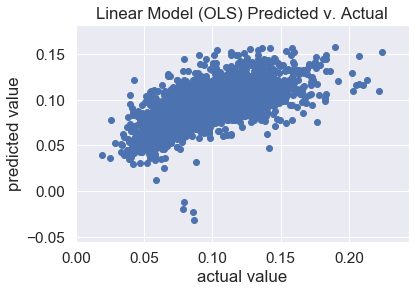

0.020898111452047115

In [72]:
from sklearn.model_selection import cross_val_predict

y = diabetes_rates['Diabetes_Number']
X = diabetes_rates.drop(['Diabetes_Number', 'diabetes_top25'], axis = 1)

lin_pred = cross_val_predict(lin_reg, X, y, cv=5)

plt.scatter(y, lin_pred)
plt.title('Linear Model (OLS) Predicted v. Actual')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()   

rmse(lin_pred, y)

#### Qualitative (Categorical) Outcome

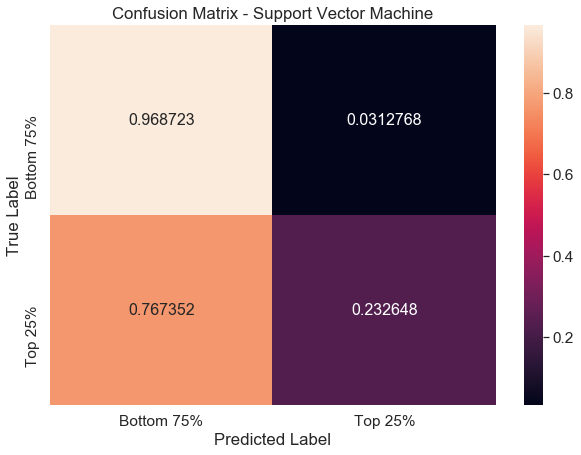

In [73]:
Xclass = diabetes_rates.drop(['Diabetes_Number', 'diabetes_top25'], axis = 1)
yclass= diabetes_rates['diabetes_top25']


svm_pred = cross_val_predict(svm, Xclass, yclass, cv=5)

cf_matrix = confusion_matrix(yclass, svm_pred, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
              range(2))

df_cm = df_cm.rename(index=str, columns={0: "Bottom 75%", 1: "Top 25%"})
df_cm.index = ["Bottom 75%", "Top 25%"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix - Support Vector Machine")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## 6: Discussion Questions

#### What is bias-variance tradeoff. Why is it relevant to machine learning problems like this one?

The bias-variance tradeoff refers to a difficulty we face in building statistical models. When models are made to fit very closely to the data, often using a lot of different features or variables in the process, this introduces a lot of variance, or flexibility of fit. The upside of high dimensionality models is that they are very accurate to the training data and they have little bias.  But because of their flexibility, high dimensionality models risk measuring noise in the data and mistaking it for signal. This problem is referred to as overfitting. 

Models with lower dimensionality tend to be less accurate and more rigid, or biased. Low dimension models are likelier than high dimension models to underfit data. When choosing an appropriate machine learning model, we must strike a balance between a model that is too biased/rigid and a model that is too noisy/flexible. This is the bias-variance tradeoff.

In traditional regression applications, scientists are often most interested in accurately and unbiasedly capturing any existing relationship in their data. But in machine learning, we are looking to predict future values of our outcome based on the body of data we’ve amassed. A model that hews too closely to the data on which it was trained is less likely to make accurate predictions. In machine learning, therefore, it’s vital that we strike the right balance between capturing variance and avoiding overfitting. 

#### Define overfitting, and why it matters for machine learning. How can we address it?

Overfitting occurs when a model is so precisely matched to the training dataset that the model perceives variance in the sample as part of the underlying relationship between the independent and dependent variables. Overfitting is particularly problematic for machine learning applications, because a model that has been overfit (overfitted?) will try to predict future values of the dependent variable that match with the variance or noise in the training data. This means that overfit models will be less successful at prediction, and prediction is the whole point of machine learning. 

We can address overfitting through the use of regularizing techniques like Ridge regression and LASSO. These help us to avoid overfitting by shrinking or eliminating coefficients in our model with low values. This reduces the overall number of dimensions in the model, pushing the balance away from overfitting.

#### Discuss your Analysis in 2-3 Paragraphs. Discuss your findings and recommendations. Which counties or regions would you prioritize for the pilot program? Would your answers change based on whether you want to take into account certain features such as the race, gender, or age composition in the county? How confident would you be deploying this sort of model in a real-world application, why or why not?

A few caveats: Our predictions are made based on known (diagnosed) diabetes cases. However, in the United States today, many people are unable to access adequate medical care, including diabetes diagnosis and treatment. If diabetes is more common among populations with lesser access to medical care, this gives us greater reason to believe our measurement of diabetes prevalence is flawed.

The data provided do not tell us the demographics (age, gender, race, education, etc.) of the people who have been diagnosed with diabetes. This means that rather than directly capturing that, for instance, it is Asian women over age 70 with the highest prevalence of diabetes, we could only see that counties with a higher proportion of Asian women over age 70 also have a higher proportion of diabetes cases. We recommend additional analysis with data at a more granular level before implementing the intervention.